In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/Final Project - Lan/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Final Project - Lan


In [ ]:
#Eymon Lan 661681496
#Final Project

import pandas as pd
import numpy as np
# Read the CSV file
df = pd.read_csv('Data.csv')

# Print the data
print(df.shape)

data = df.values
print(data.shape)

(284, 50)
(284, 50)


In [ ]:
# filter out the rows and only keep final time step
rows_to_keep = np.where(data[:,0] == 7200)[0]
data1 = data[rows_to_keep, :]
print(data1.shape)

(100, 50)


In [ ]:
# define input
X = np.linspace(1, 10, 100)
print(X.shape)
X = X.reshape((X.shape[0],1))
#print(len(x))
print(X.shape)
#print(y)

(100,)
(100, 1)


In [ ]:
# Post processing data
Tvap = data1[:, 1:17:2]
Qtie = data1[:, 18:34:2]
Area = data1[:, 35:52:2]
Qflux = Qtie/Area
#y = np.concatenate((Qflux,Tvap),axis=1)
y = Qflux
print(Tvap.shape)
print(Qtie.shape)
print(y.shape)
print(y[99])
#print(X)



(100, 8)
(100, 8)
(100, 8)
[3.29769497 5.85123313 7.3871163  7.99548958 8.30885681 5.79260658
 3.38587989 1.46014067]


In [ ]:
# write the DataFrame to a new Excel file in your Google Drive
import pandas as pd
Data_PP = np.concatenate((X,y),axis=1)
print(Data_PP.shape)
df = pd.DataFrame(Data_PP)

with pd.ExcelWriter('/content/drive/My Drive/Colab Notebooks/Final Project - Lan/new_excel_file.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)

(100, 9)


In [ ]:
# ANN Model to predict heat flux
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 1)
(10, 1)
(90, 8)
(10, 8)


In [ ]:
# Verify the post processed/split data make sense
print(X_train.shape)
print(X_train[0])
print(y_train[0])
print(X_train.shape)
print(y_train.shape)

(90, 1)
[2.63636364]
[0.99178151 1.83341944 2.36064022 2.55500345 2.67527215 1.80365901
 1.06291886 0.51239087]
(90, 1)
(90, 8)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Simple linear regression model
import tensorflow as tf
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf)
lr_mean_r2 = lr_scores.mean()

lr_model.fit(X_train_scaled, y_train)

#print(X_train.shape)
lr_pred = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

# Print the Linear regression metrics
print('Linear Regression results:')
print('Degree of polynomial:', 1)
print('Cross-Validation R^2:{0:.5g}'.format(lr_mean_r2))
print("Mean Absolute Error (MAE):{0:.5g}".format(lr_mae))
print('Mean Squared Error (MSE):{0:.5g}'.format(lr_mse))
print('Root Mean Squared Error (RMSE):{0:.5g}'.format(lr_rmse))
print('Coefficient of Determination (R^2 score):{0:.5g}'.format(lr_r2))

Linear Regression results:
Degree of polynomial: 1
Cross-Validation R^2:0.98166
Mean Absolute Error (MAE):0.15797
Mean Squared Error (MSE):0.049381
Root Mean Squared Error (RMSE):0.22222
Coefficient of Determination (R^2 score):0.97743


In [ ]:
# Fit a polynomial regression model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

degree = 3 # set the degree of the polynomial function
pr_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
pr_model.fit(X_train_scaled, y_train)

# Define the number of folds for cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate the mean R^2 score
pr_scores = cross_val_score(pr_model, X_train_scaled, y_train, cv=cv, scoring='r2')
pr_mean_r2 = np.mean(pr_scores)

# Fit the model to the training data
pr_model.fit(X_train_scaled, y_train)
pr_pred = pr_model.predict(X_test_scaled)
#print(y_pred)

# Calculate regression metrics
pr_mae = mean_absolute_error(y_test, pr_pred)
pr_mse = mean_squared_error(y_test, pr_pred)
pr_rmse = np.sqrt(pr_mse)
pr_r2 = r2_score(y_test, pr_pred)

# Print the regression metrics
print('Polynomial Regression results:')
print('Degree of polynomial:', degree)
print('Cross-Validation R^2:{0:.5g}'.format(pr_mean_r2))
print("Mean Absolute Error (MAE): {0:.5g}".format(pr_mae))
print('Mean Squared Error (MSE):{0:.5g}'.format(pr_mse))
print('Root Mean Squared Error (RMSE):{0:.5g}'.format(pr_rmse))
print('Coefficient of Determination (R^2 score):{0:.5g}'.format(pr_r2))

Polynomial Regression results:
Degree of polynomial: 3
Cross-Validation R^2:0.99995
Mean Absolute Error (MAE): 0.0092171
Mean Squared Error (MSE):0.0001436
Root Mean Squared Error (RMSE):0.011983
Coefficient of Determination (R^2 score):0.99989


In [ ]:
# Fit a decision tree regression
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=2)

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

# Create a k-fold cross-validation object
cv = KFold(n_splits=10, shuffle=True, random_state=42)
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=cv, scoring='r2')
dt_mean_r2 = np.mean(pr_scores)
# Predict on the test data
dt_pred = dt_model.predict(X_test_scaled)

# Calculate regression metrics
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

# Print the regression metrics
print('Decision Tree Regression results:')
print('Cross-Validation R^2:{0:.5g}'.format(dt_mean_r2))
print("Mean Absolute Error (MAE): {0:.5g}".format(dt_mae))
print('Mean Squared Error (MSE):{0:.5g}'.format(dt_mse))
print('Root Mean Squared Error (RMSE):{0:.5g}'.format(dt_rmse))
print('Coefficient of Determination (R^2 score):{0:.5g}'.format(dt_r2))


Decision Tree Regression results:
Cross-Validation R^2:0.99995
Mean Absolute Error (MAE): 0.053505
Mean Squared Error (MSE):0.0036403
Root Mean Squared Error (RMSE):0.060335
Coefficient of Determination (R^2 score):0.99842


(100, 1)


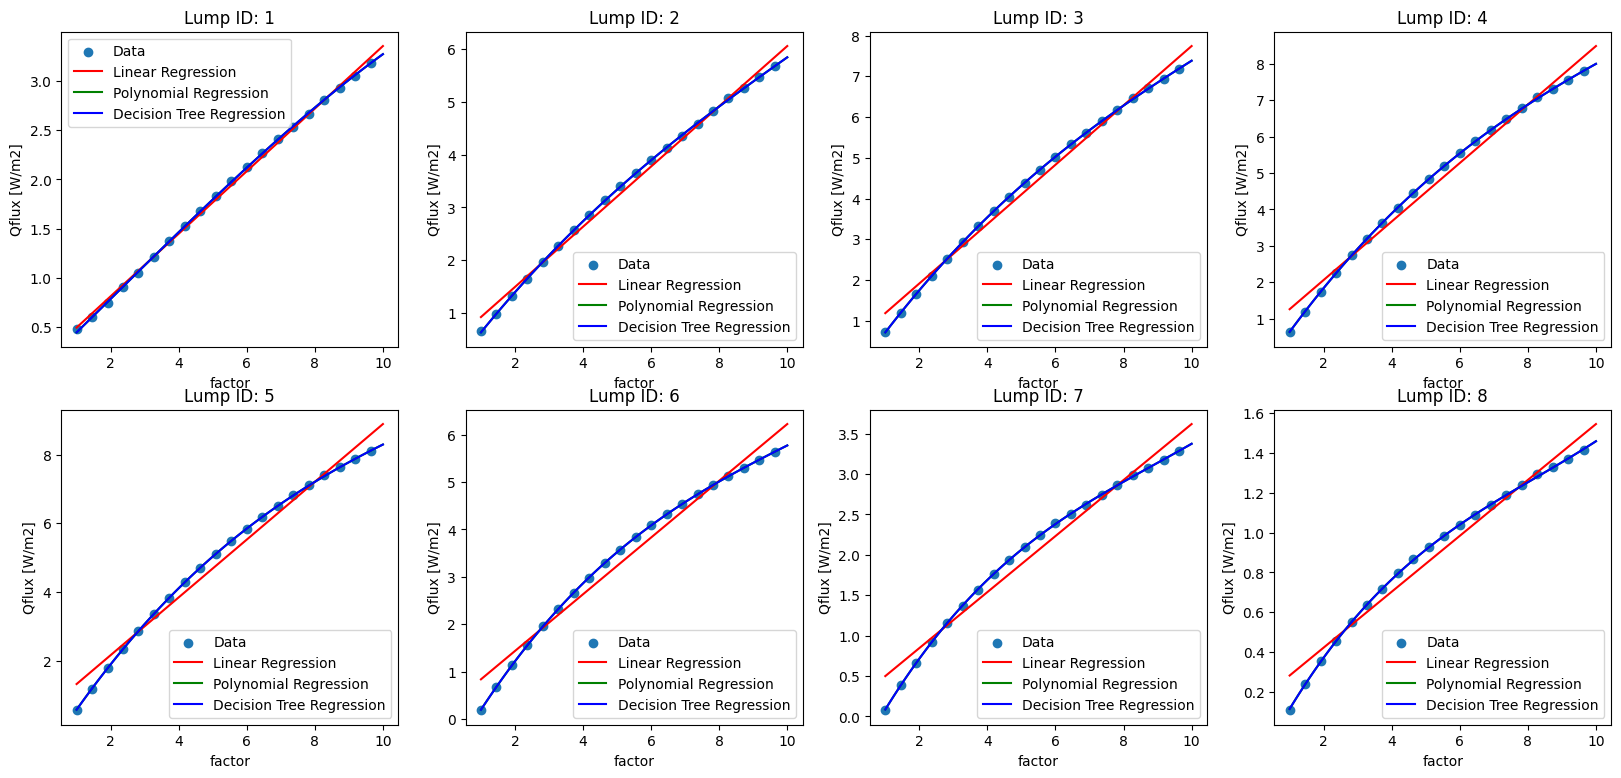

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(1, 10, 100)
x = x.reshape(-1,1)
x_scaled = scaler.fit_transform(x)
lumpID = np.linspace(1,8,8)
lumpID = lumpID.astype(int)
#print(x_scaled)
print(x.shape)
lr_model.fit(x_scaled, y)
pr_model.fit(x_scaled, y)
dt_model.fit(x_scaled, y)
lr_pred = lr_model.predict(x_scaled)
pr_pred = pr_model.predict(x_scaled)
dt_pred = pr_model.predict(x_scaled)

features=['q1','q2','q3','q4','q5','q6','q7','q8']
fig, axs = plt.subplots(2, 4, figsize=(20, 9))

for i in range(8):
    axs[i//4, i%4].scatter(X[::5], y[::5,i], label='Data')
    axs[i//4, i%4].plot(x, lr_pred[:,i], color='r', label='Linear Regression')
    axs[i//4, i%4].plot(x, pr_pred[:,i], color='g', label='Polynomial Regression')
    axs[i//4, i%4].plot(x, dt_pred[:,i], color='b', label='Decision Tree Regression')
    axs[i//4, i%4].set_title('Lump ID: {0}'.format(lumpID[i]))
    axs[i//4, i%4].set_xlabel('factor')
    axs[i//4, i%4].set_ylabel('Qflux [W/m2]')
    axs[i//4, i%4].legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt


factor = np.linspace(1,10,10)
factor = factor.reshape(-1,1)
#print(factor[:])
factor = factor.astype(int)
factor_scaled = scaler.fit_transform(factor)
lr_pred = lr_model.predict(x_scaled)
pr_pred = pr_model.predict(x_scaled)
dt_pred = pr_model.predict(x_scaled)

#print(lr_pred)

In [ ]:
#acquire dataset for comparison with corresponding heat load factor
rows_to_keep1 = np.where(Data_PP[:,0] == factor[:])[1]
dataset = Data_PP[rows_to_keep1, 1::]

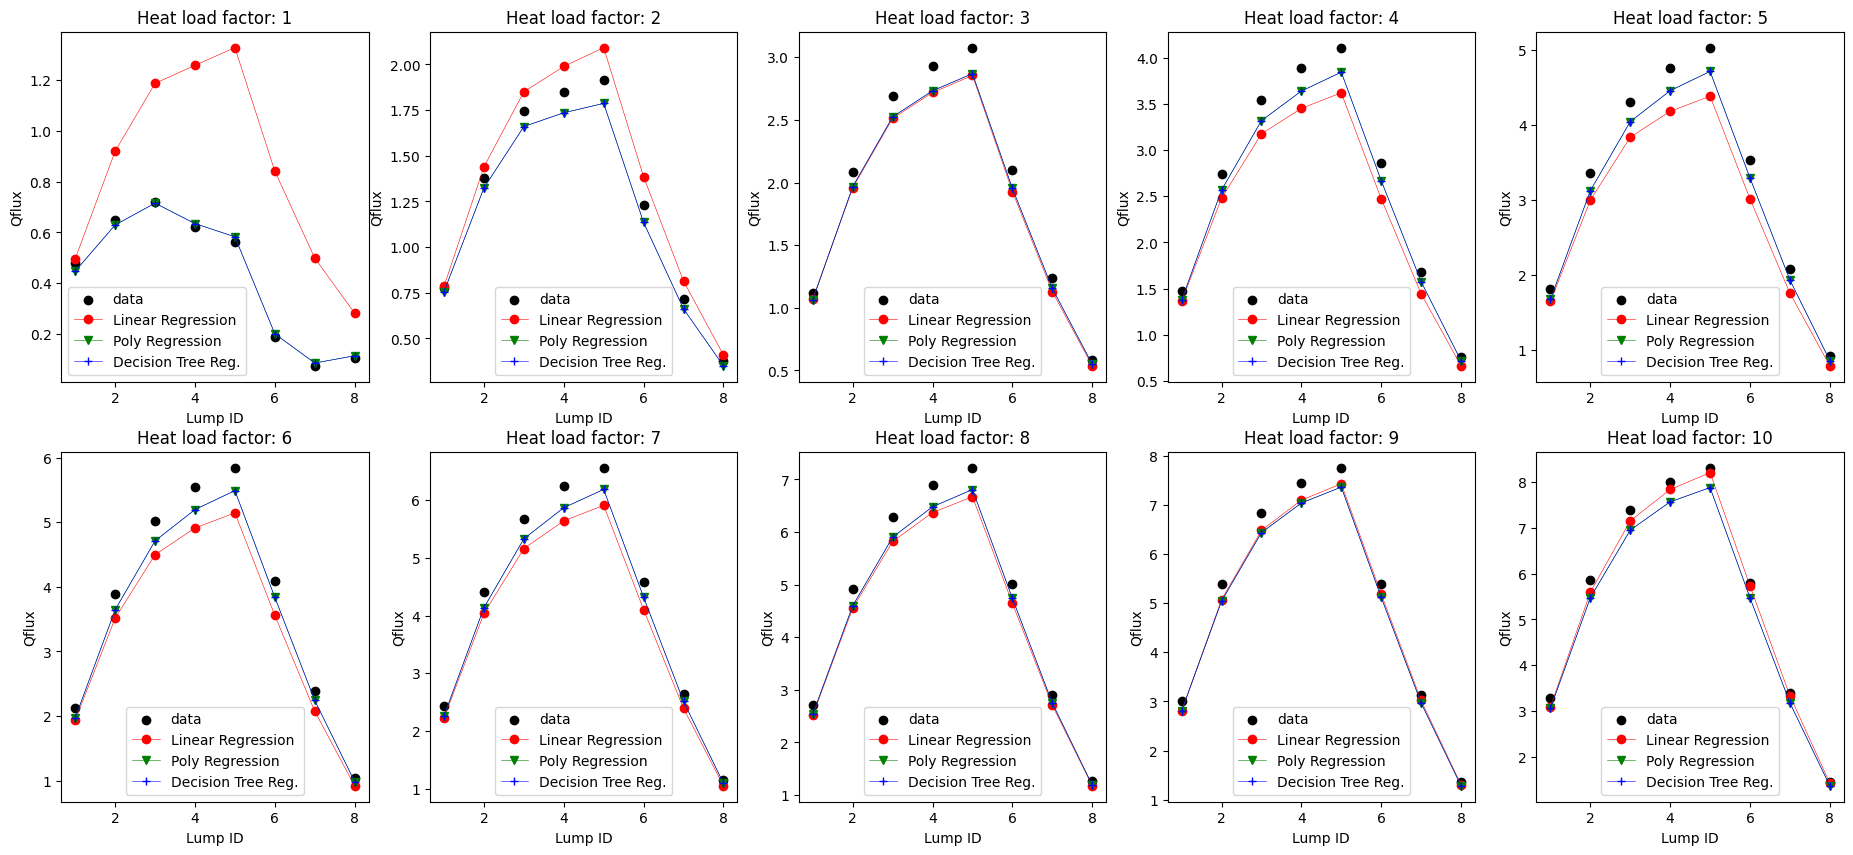

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(23, 10))

for i in range(10):
    #print(pr_pred[i])
    #print(lumpID)
    axs[i//5, i%5].scatter(lumpID,dataset[i], color='k', label='data')
    axs[i//5, i%5].plot(lumpID,lr_pred[10*i,:], 'ro-', linewidth=0.4, label='Linear Regression')
    axs[i//5, i%5].plot(lumpID,pr_pred[10*i,:], 'gv-', linewidth=0.4, label='Poly Regression')
    axs[i//5, i%5].plot(lumpID,dt_pred[10*i,:], 'b+-', linewidth=0.4, label='Decision Tree Reg.')
    axs[i//5, i%5].set_xlabel('Lump ID')
    axs[i//5, i%5].set_ylabel('Qflux')
    axs[i//5, i%5].set_title('Heat load factor: {0}'.format(factor[i][0]))
    axs[i//5, i%5].legend()
plt.show()

In [ ]:
n=10
for i in range(1,n):
  print(i)

1
2
3
4
5
6
7
8
9
